In [2]:
import bc


Maximum accuracy using Logistic Regression = 96.4912 with C = 6.250000
Time taken for LogReg = 0.03 seconds


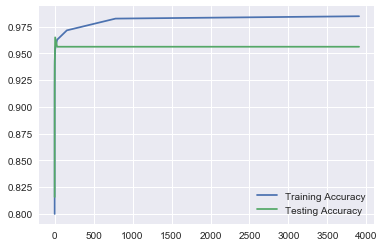

UnboundLocalError: local variable 'nn_acc' referenced before assignment

In [5]:
exec(open("bc.py").read())


 50
Training Accuracy: 92.0879120879
Test Accuracy: 92.1052631579
Time taken: 52.9314

 51
Training Accuracy: 92.967032967
Test Accuracy: 90.350877193
Time taken: 53.5699

 52
Training Accuracy: 92.5274725275
Test Accuracy: 92.9824561404
Time taken: 53.8288

 53
Training Accuracy: 92.7472527473
Test Accuracy: 88.5964912281
Time taken: 52.8479

 54
Training Accuracy: 94.2857142857
Test Accuracy: 93.8596491228
Time taken: 53.8525

 55
Training Accuracy: 92.0879120879
Test Accuracy: 91.2280701754
Time taken: 53.9910

 56
Training Accuracy: 92.5274725275
Test Accuracy: 94.7368421053
Time taken: 55.1604

 57
Training Accuracy: 92.0879120879
Test Accuracy: 92.9824561404
Time taken: 55.4965

 58
Training Accuracy: 92.5274725275
Test Accuracy: 88.5964912281
Time taken: 55.4741

 59
Training Accuracy: 91.2087912088
Test Accuracy: 96.4912280702
Time taken: 55.7161

 60
Training Accuracy: 92.0879120879
Test Accuracy: 90.350877193
Time taken: 57.3029

 61
Training Accuracy: 93.1868131868
Test Acc

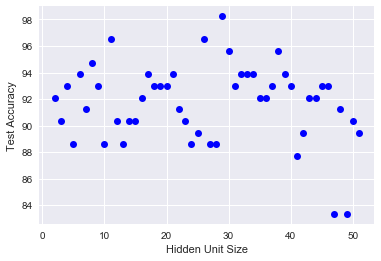

Cost after iteration 0: 0.693160
Cost after iteration 1000: 0.641446
Cost after iteration 2000: 0.431946
Cost after iteration 3000: 0.375372
Cost after iteration 4000: 0.341437
Cost after iteration 5000: 0.319219
Cost after iteration 6000: 0.298024
Cost after iteration 7000: 0.283739
Cost after iteration 8000: 0.271551
Cost after iteration 9000: 0.259631
Cost after iteration 10000: 0.248966
Cost after iteration 11000: 0.245556
Cost after iteration 12000: 0.275174
Cost after iteration 13000: 0.202904
Cost after iteration 14000: 0.209403
Training Accuracy: 92.3076923077
Test Accuracy: 93.8596491228


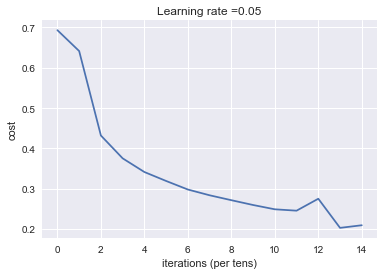


Maximum accuracy using Logistic Regression = 99.1228 with C = 781.250000
Time taken for LogReg = 0.04 seconds


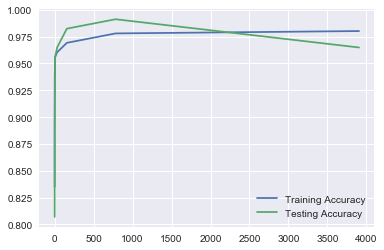

Running SVM with  C = 0.010000 
Running SVM with  C = 0.020000 
Running SVM with  C = 0.040000 
Running SVM with  C = 0.080000 
Running SVM with  C = 0.160000 
Running SVM with  C = 0.320000 
Running SVM with  C = 0.640000 
Running SVM with  C = 1.280000 
Running SVM with  C = 2.560000 
Running SVM with  C = 5.120000 
Best Accuracy: 96.491228 with C= 0.3200 using rbf kernel
Average time taken for SVM = 14.5047 seconds

Accuracy using SVM with  rbf : 96.4912280702
Time taken for  rbf  = 145.0489 seconds
Running SVM with  C = 0.010000 
Running SVM with  C = 0.020000 
Running SVM with  C = 0.040000 
Running SVM with  C = 0.080000 
Running SVM with  C = 0.160000 
Running SVM with  C = 0.320000 
Running SVM with  C = 0.640000 
Running SVM with  C = 1.280000 
Running SVM with  C = 2.560000 
Running SVM with  C = 5.120000 
Best Accuracy: 95.614035 with C= 2.5600 using linear kernel
Average time taken for SVM = 15.8047 seconds

Accuracy using SVM with  linear : 95.6140350877
Time taken for  li

In [3]:
import warnings,math
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
import pandas as pd
import tensorflow as tf
import operator,time,sys; import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import linear_model,metrics
from sklearn.mixture import GMM
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV,train_test_split,KFold, cross_val_score
import sklearn,matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
#from scipy.optimize import fmin_bfgs as bfgs
from sklearn.metrics import log_loss
#%matplotlib inline
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
def load(str):

	df = pd.read_csv(str, header = 0)
	x = df.ix[:,df.columns!='diagnosis']
	y = df.ix[:,df.columns=='diagnosis']
	#print(y)
	y = y['diagnosis'].map({'M':1,'B':0})
	
	x = x.drop(['id','Unnamed: 32','area_mean','perimeter_mean','concavity_mean','concave points_mean','area_worst','perimeter_worst',
		'concave points_worst','concavity_worst','area_se','perimeter_se'],axis = 1)
	features = []
	for i in x:
		features.append(i)
	frames = [x,y]
	total = pd.concat(frames,axis = 1)
	#print(total)
	#total.info()
	return total, features

def report(grid_scores , n_top = 3):
    top_scores = sorted(grid_scores, key = operator.itemgetter(1), reverse= True)[:n_top]

def gmm(x,features):
	del features[-1]
	train, test = train_test_split(x, test_size = 0.2)
	train_x,test_x = train[features],test[features]
	train_y, test_y = train.diagnosis, test.diagnosis
	start = time.time()
	x_all = np.r_[train_x,test_x]
	lowest_bic = np.infty
	bic = []
	n_components_range = range(1,7)

	cv_types = ['spherical', 'tied', 'diag', 'full']
	for i in cv_types:
		for j in n_components_range:
			gmm = GMM(n_components= j, covariance_type = i,min_covar = 0.0001)

			gmm.fit(x_all)
			bic.append(gmm.aic(x_all))
			if bic[-1] < lowest_bic:
				lowest_bic = bic[-1]
				best_gmm = gmm
	g = best_gmm
	g.fit(x_all)

	x=g.predict_proba(train_x)

	clf = RandomForestClassifier(n_estimators=1500, criterion='entropy', max_depth=15, min_samples_split = 2,min_samples_leaf=3, max_features='auto',
	 n_jobs=-1,random_state=343)
	param_grid = dict()

	grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv = 5).fit(x,train_y)
	#print(grid_search.best_estimator_)
	report(grid_search.cv_results_)
	svc = grid_search.best_estimator_.fit(x,train_y)
	###################
	grid_search.best_estimator_.score(x, train_y)
	scores = cross_val_score(svc, x, train_y, cv=5, scoring='accuracy')
	#print(scores.mean(), scores.min())
	#print(scores)
	x_t = g.predict_proba(test_x)

	y_pred = grid_search.best_estimator_.predict(x_t)
	end = time.time()
	print("Time taken for RandomForestClassifier with GMM = %.2f seconds"%(end-start))
	#print("Accuracy using RandomForestClassifier with GMM = %.3f"%(metrics.accuracy_score(y_pred,test_y)*100))
	return(metrics.accuracy_score(y_pred,test_y)*100)

def RandomForests(x,features):
	#RandomForests
	del features[-1]
	train, test = train_test_split(x, test_size = 0.2)
	train_x,test_x = train[features],test[features]
	train_y, test_y = train.diagnosis, test.diagnosis
	start = time.time()
	clf = RandomForestClassifier(n_estimators = 1000, max_features = 'auto', criterion = 'entropy',random_state = 30, min_samples_leaf = 5, n_jobs = 2)
	clf.fit(train_x,train_y)
	end = time.time()
	y_pred = clf.predict(test_x)
	acc_2 = metrics.accuracy_score(y_pred,test_y)
	print("\nTime taken for Random Forest Classifier = %.4f seconds"%(end-start))


	return acc_2*100

def KNN():
	#K-Nearest Neighbors
	pass

def LogReg(x, features):
	#Logistic Regression
	del features[-1]
	train, test = train_test_split(x,test_size = 0.2) # 5 fold CV
	train_x, test_x = train[features], test[features]
	train_y, test_y = train.diagnosis,test.diagnosis
	start = time.time()
	c_p = []
	acc_dict = {}
	t= 0.01
	training_accuracy = []
	testing_accuracy = []
	while t<=pow(10,4):
		c_p.append(t)
		t*=5
	for c in c_p:
		#print("Running Log Reg with %.6f"%(c))
		clf = LogisticRegression(C = c, penalty = 'l2')
		# training model using given data
		clf.fit(train_x,train_y)

		#training set accuracy
		y_pred_train = clf.predict(train_x)
		acc_train = metrics.accuracy_score(y_pred_train,train_y)
		training_accuracy.append(acc_train)

		# test set accuracy
		y_pred_test = clf.predict(test_x)
		acc_test = metrics.accuracy_score(y_pred_test,test_y)
		testing_accuracy.append(acc_test)
		acc_dict[c] = acc_test
		#print("Accuracy = ",acc_test)
	end = time.time()
	print("\nMaximum accuracy using Logistic Regression = %.4f with C = %.6f"%( max(acc_dict.items(),key = operator.itemgetter(1))[1]*100,
		max(acc_dict.items(), key = operator.itemgetter(1))[0]))
	print("Time taken for LogReg = %.2f seconds"%(end-start))
	#print(c_p) 
	plt.plot(c_p,training_accuracy, label = 'Training Accuracy')
	plt.plot(c_p,testing_accuracy, label = 'Testing Accuracy')
	plt.legend()
	plt.show()

def ADB():
	#adaBoost
	pass

def SVM(x,features,kernel = 'rbf'):
	del features[-1]
	#for pos,val in enumerate(features):	print(pos,val)
	train, test = train_test_split(x, test_size = 0.2)
	train_x,test_x = train[features],test[features]
	train_y, test_y = train.diagnosis, test.diagnosis
	#for pos,val in enumerate(train_x):	print(pos,val)
	#print(train_x.shape)
	#print(test_x.shape)
	kernel = str(kernel)
	start = time.time()
	c_param_range = []
	t=0.01
	while t<=pow(10,1):
		c_param_range.append(t)
		t*=2


	results_table_svm = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Accuracy'])
	results_table_svm['C_parameter'] = c_param_range
	j = 0
	
	acc_dict_svm={}
	for c_param in c_param_range:
		print("Running SVM with  C = %f "%(c_param))
			
		clf = BaggingClassifier(SVC(C = c_param, kernel = kernel),n_jobs=-1)

		clf.fit(train_x,train_y)

		y_pred = clf.predict(test_x)

		acc = metrics.accuracy_score(y_pred,test_y)


		acc_dict_svm[c_param]=acc
		results_table_svm.ix[j,'Accuracy'] = acc
		j += 1


	best_c_svm = results_table_svm.loc[results_table_svm['Accuracy'].idxmax()]['C_parameter']
	print("Best Accuracy: %f with C= %.4f using %s kernel"%(max(acc_dict_svm.items(),key = operator.itemgetter(1))[1]*100,
		max(acc_dict_svm.items(),key = operator.itemgetter(1))[0],kernel))
	end = time.time()
	print("Average time taken for SVM = %.4f seconds"%((end-start)/len(c_param_range)))
	return acc_dict_svm[best_c_svm]

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    #assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache
def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(13456)
    

    W1 = np.random.randn(n_h,n_x) * 0.01 /np.sqrt(n_h)
    b1 = np.random.randn(n_h,1)*0.01/np.sqrt(n_h)
    W2 = np.random.randn(n_y,n_h) * 0.01 /np.sqrt(n_y)
    b2 = np.random.randn(n_y,1)*0.01 /np.sqrt(n_y)
   
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def initialize_parameters_deep(layer_dims):

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
  
    return parameters

def linear_forward(A, W, b):

    Z = np.dot(W,A) + b
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)],parameters['b' + str(l)],activation='relu')
        
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)],parameters['b' + str(L)],activation='sigmoid')
    caches.append(cache)    
    #assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

def compute_cost(AL, Y):

    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.dot(Y, np.log(AL).T) + np.dot(1 - Y, np.log(1 - AL).T))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    #assert(cost.shape == ())
    
    return cost

def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, cache[0].T) / m
    db = (np.sum(dZ,axis = 1, keepdims = True)) / m
    #print(db.shape)
    dA_prev = np.dot(cache[1].T,dZ)

    return dA_prev, dW, db

def relu_backward(dA, cache):

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    #assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):

    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    #assert (dZ.shape == Z.shape)
    
    return dZ

def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,
                                                                                                  current_cache,
                                                                                                  "sigmoid")

    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA{}".format(l + 2)],
                                                                    current_cache,
                                                                    "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W{}".format(l + 1)] - learning_rate * grads["dW{}".format(l + 1)]
        parameters["b" + str(l+1)] = parameters["b{}".format(l + 1)] - learning_rate * grads["db{}".format(l + 1)]
    return parameters

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Test Accuracy: "  + str(np.sum((p == y)*100/m)))
        
    return np.sum((p == y)*100/m)

def two_layer_model(data, features,n_h, learning_rate = 0.015, num_iterations = 30000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    """
    start = time.time()
    del features[-1]
    train, test = train_test_split(data, test_size = 0.2)
    train_x,test_x = train[features],test[features]
    train_y, test_y = train.diagnosis.values.reshape((train.diagnosis.shape[0],1)),test.diagnosis.values.reshape((test.diagnosis.shape[0],1))
    train_x,test_x = train_x.T,test_x.T
    train_y = train_y.T
    test_y = test_y.T
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = train_x.shape[1]                           # number of examples
    n_x = train_x.shape[0]
    n_h = n_h
    n_y = train_y.shape[0]
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(train_x, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, train_y)
        ### END CODE HERE ###
        if cost <= 0.1:
        	break
        # Initializing backward propagation
        dA2 = - (np.divide(train_y, A2) - np.divide(1 - train_y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
       

    
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(train_x, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    #print(p.shape)
    #print('\n',test_y.shape)
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Training Accuracy: "  + str(np.sum((p == train_y)*100)/455))
    a = predict(test_x,test_y,parameters)
    end = time.time()
    print("Time taken: %.4f"%(end-start))
    return a
    ###### plot the cost   #######
"""
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
"""
	

def L_layer_model(data, features, layers_dims, learning_rate = 0.015, num_iterations = 5000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    start = time.time()
    del features[-1]
    train, test = train_test_split(data, test_size = 0.2)
    train_x,test_x = train[features],test[features]
    train_y, test_y = train.diagnosis.values.reshape((train.diagnosis.shape[0],1)),test.diagnosis.values.reshape((test.diagnosis.shape[0],1))
    train_x,test_x = train_x.T,test_x.T
    train_y = train_y.T
    test_y = test_y.T
    np.random.seed(11)
    costs = []                         # keep track of cost
    m = train_x.shape[1]
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(train_x, parameters)

        # Compute cost.

        cost = compute_cost(AL, train_y)
        if cost < 0.1:
        	pass
    
        # Backward propagation.

        grads = L_model_backward(AL, train_y, caches)

 
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)
              

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
        p = np.zeros((1,m))
    
    # Forward propagation
        probas, caches = L_model_forward(train_x, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
        	p[0,i] = 1
        else:
            p[0,i] = 0

    print("Training Accuracy: "  + str(np.sum((p == train_y) * 100 )/455))
    predict(test_x,test_y,parameters)
    end = time.time()
    #print("Time taken: %.4f"%(end-start))
    ###### plot the cost   #######


    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
def NeuralNetwork(x,features):
	# Neural Network with one hidden layer
	# Will try and work with more hidden layers
	# Optimization of hyperparameters for one hidden layer NN supported
	# WORK IN PROGRESS
	del features[-1]
	train, test = train_test_split(x, test_size = 0.2)
	train_x,test_x = train[features],test[features]
	train_y, test_y = train.diagnosis.values.reshape((train.diagnosis.shape[0],1)),test.diagnosis.values.reshape((test.diagnosis.shape[0],1))
	train_y = train_y.T
	test_y = test_y.T
	"""
	# Checking dimensions
	print(test_y, '\n',test.diagnosis)
	print("shape of train_x = ",train_x.shape)
	print("shape of test_x = ",test_x.shape)
	print("shape of train_y = ",train_y.shape)
	print("shape of test_y = ",test_y.shape)
	"""
	
	# DEFINING PARAMETERS 
	n_h = 5 # number of hidden units
	
	# layer 1 (input layer)

	w1 = np.random.randn(n_h,train_x.shape[1])*0.01/np.sqrt(train_x.shape[0])
	b1 = np.random.randn(n_h,1)*0.01
	w2 = np.random.randn(train_y.shape[0],n_h)*0.01/np.sqrt(train_y.shape[0])
	b2 = np.random.randn(train_y.shape[0],1)*0.01

	num_iters = 10
	learning_rate = 0.1
	m = (1/train_y.shape[1])
	for i in range(num_iters):
		#print(w1.shape,w2.shape,b1.shape,b2.shape) # checkind dimensions

		###### FORWARD PROPAGATION #######

		z1 = np.dot(w1,train_x.T) + b1 # linear transform
		A1 = np.maximum(z1,0.001*z1) # ReLu Activation or maybe we can use leaky ReLu 
		z2 = np.dot(w2,A1) + b2
		A2 = (1/(1+np.exp(-z2))) # sigmoid activation to get y hat 

		
		#print(np.log(abs(1-A2)))
		#cost = -(1/m)*np.sum(np.dot(train_y,np.log(A2).T)+np.dot(1-train_y,np.log(1-A2).T))
		cost = log_loss(train_y,A2) # this is throwing some error, 
									 # no patiance to workaround, will write own loss function
		#print(z2)
		#print("Iteration %i, cost %.4f"%(i,cost))

		

		###### 	BACKWARD PROPAGATION #######

		#dA2 = train_y/A2 + (1-train_y)/(1-A2)

		dA2 = - (np.divide(train_y, A2) - np.divide(1 - train_y, 1 - A2))
		#print(dA2)
		dz2 = (dA2*(z2*(1-z2))) # deriative of sigmoid 

		dw2 = (np.dot(dz2,A1.T))/m

		# print(w2.shape,dw2.shape) # checking fwd bwd param dims

		db2 = np.sum(dz2, axis = 1, keepdims = True) / m

		dA1 = np.dot(w2.T,dz2)

		
		dz1 = (dA1 ) #relu derivative (modified, ReLu is not differentiable at 0 )

		dw1 = np.dot(dz1,train_x) / m

		db1 = np.sum(dz1, axis = 1, keepdims = True) / m
		#print(w1.shape,dw1.shape, b1.shape, db1.shape) # checking fwd bwd param dims
		
		##### UPDATING PARAMETERS ######

		w1 = w1 - learning_rate * dw1
		b1 = b1 - learning_rate * db1
		w2 = w2 - learning_rate * dw2
		b2 = b2 - learning_rate * db2
		cost2 = -(1/m)*np.sum(np.dot(train_y,np.log(A2).T))
		#print("Iteration %i, cost2 %.4f"%(i,cost2))

def call_function(x):
	data, features =load('bc.csv')
	""" FUNCTION CALLS """
	function = str(x)
	
	if function == "LR":
		LogReg(data,features)
	elif function == "NN":
		#hidden_unit_size = [5 , 10 , 15 , 20 , 25 , 50 , 100 , 200 , 500, 1000]
		#hidden_unit_size = [5 , 10 , 15 , 20 , 25 , 26, 27, 28, 29, 30]
		arr_res=[]
		#parameters = two_layer_model(data, features,100, learning_rate = 0.0050, num_iterations = 30000, print_cost = True)
		start = time.time()
		for i in range(50,100):
			data, features =load('bc.csv')
			print('\n',i)
			parameters = two_layer_model(data, features,2*i, learning_rate = 0.0035, num_iterations = 30000, print_cost = False)
			arr_res.append(parameters)
		end = time.time()

		print("Time taken = %.4f"%(end-start))
		plt.plot([i+1 for i in range(1,51)],arr_res,'bo')
		plt.ylabel("Test Accuracy")
		plt.xlabel("Hidden Unit Size")
		plt.show()
		
	elif function == "GMM":	
		print("\nAccuracy with Random Forest Classifier using GMM = %.4f\n"%(gmm(data,features)))
	elif function == "RFC":	
		print("\nAccuracy with Random Forest Classifier = .%4f\n"%(RandomForests(data , features)))
	elif function == "SVM":	
		kernels = ['rbf','linear','poly','sigmoid']
		LogReg(data,features)
		for i in kernels:	
			start = time.time()
			print("\nAccuracy using SVM with ",i,":",SVM(data,features,i)*100)
			end = time.time()
			print("Time taken for ",i," = %.4f seconds"%(end-start))
	elif function == "DNN":
		layers_dims = [19, 100,100,100, 1]
		L_layer_model(data, features, layers_dims, learning_rate = 0.05, num_iterations = 15000, print_cost = True)		

if __name__ == '__main__':

    # LR = Logistic Regression
    # SVM = SVM
    # NN = one hidden layer NN
    # DNN = explicit number of hidden layers with L-1 ReLu and final Sigmoid layer
    # RFC = Random Forest
    # GMM = Random Forest with Gaussian Mixture
	#call_function("LR")
	call_function("NN")
	call_function("DNN")
	call_function("SVM")
	#call_function("RFC")
	#call_function("GMM")